# Pharmalytix

In [1]:
# Used to display all the matplotlib graphs inside the notebook
%matplotlib inline 

# Hiding the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
from wordcloud import WordCloud, STOPWORDS

In [3]:
sns.set() # Setting the default seaborn style for all the plots

## Data Integration

In [4]:
od.download('https://www.kaggle.com/datasets/thedevastator/drug-performance-evaluation', force=True)

100%|█████████████████████████████████████████████████████████████████████████████| 72.4k/72.4k [00:00<00:00, 2.26MB/s]

In [5]:
data1 = pd.read_csv('drug-performance-evaluation/Drug.csv')
data1.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [6]:
# Checking for duplicates and removing the duplicates

print('The shape before removing the duplicates from the data set is :',data1.shape)
data1 = data1.drop_duplicates()
print('The shape after removing the duplicates from the data set is :',data1.shape)

The shape before removing the duplicates from the data set is : (2219, 9)
The shape after removing the duplicates from the data set is : (1753, 9)


In [7]:
data2 = pd.read_csv('drug-performance-evaluation/Drug_clean.csv')
data2.head()

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX


In [8]:
# Checking for duplicates and removing the duplicates

print('The shape before removing the duplicates from the data set is :',data2.shape)
data2 = data2.drop_duplicates()
print('The shape after removing the duplicates from the data set is :',data2.shape)

The shape before removing the duplicates from the data set is : (685, 10)
The shape after removing the duplicates from the data set is : (685, 10)


In [9]:
data = data1.merge(data2.drop(['EaseOfUse', 'Effective', 'Indication','Reviews', 'Satisfaction', 'Type'], axis=1), 
                on = ['Condition', 'Drug'], how ='left')

data.head(10)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information,Form,Price
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...,Tablet,172.990000
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...,Liquid (Drink),74.990000
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...,Tablet,32.100000
3,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437 Reviews,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...,Liquid (Drink),287.370000
4,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437 Reviews,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...,Tablet,70.608571
5,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361 Reviews,2.44,2.96,1.68,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...,Tablet,172.990000
6,Acute Bacterial Sinusitis,Amoxicillin,On Label,RX,353 Reviews,3.04,3.37,2.34,\r\n\t\t\t\t\tAmoxicillin is used to treat a w...,Capsule,12.590000
7,Acute Bacterial Sinusitis,Clarithromycin,On Label,RX,222 Reviews,3.00,3.40,2.18,\r\n\t\t\t\t\tClarithromycin is used to treat ...,Tablet,99.490000
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,140 Reviews,2.74,3.04,2.12,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...,Liquid (Drink),287.370000
9,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,140 Reviews,2.74,3.04,2.12,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...,Tablet,70.608571


In [10]:
# Checking for duplicates and removing the duplicates

print('The shape before removing the duplicates from the data set is :',data.shape)
data = data.drop_duplicates()
print('The shape after removing the duplicates from the data set is :',data.shape)

The shape before removing the duplicates from the data set is : (2624, 11)
The shape after removing the duplicates from the data set is : (2377, 11)


In [11]:
data.head(10)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information,Form,Price
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...,Tablet,172.990000
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...,Liquid (Drink),74.990000
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...,Tablet,32.100000
3,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437 Reviews,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...,Liquid (Drink),287.370000
4,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437 Reviews,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...,Tablet,70.608571
5,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361 Reviews,2.44,2.96,1.68,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...,Tablet,172.990000
6,Acute Bacterial Sinusitis,Amoxicillin,On Label,RX,353 Reviews,3.04,3.37,2.34,\r\n\t\t\t\t\tAmoxicillin is used to treat a w...,Capsule,12.590000
7,Acute Bacterial Sinusitis,Clarithromycin,On Label,RX,222 Reviews,3.00,3.40,2.18,\r\n\t\t\t\t\tClarithromycin is used to treat ...,Tablet,99.490000
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,140 Reviews,2.74,3.04,2.12,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...,Liquid (Drink),287.370000
9,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,140 Reviews,2.74,3.04,2.12,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...,Tablet,70.608571


## Exploratory Data Analysis

In [12]:
data.info() # Checking for the data type of each of the variables and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2377 entries, 0 to 2623
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2377 non-null   object 
 1   Drug          2377 non-null   object 
 2   Indication    2377 non-null   object 
 3   Type          2377 non-null   object 
 4   Reviews       2377 non-null   object 
 5   Effective     2377 non-null   float64
 6   EaseOfUse     2377 non-null   float64
 7   Satisfaction  2377 non-null   float64
 8   Information   2377 non-null   object 
 9   Form          2377 non-null   object 
 10  Price         2377 non-null   float64
dtypes: float64(4), object(7)
memory usage: 222.8+ KB


In [13]:
data.nunique() # Getting a count of number of unique values in each column so as to identify the continuous and discrete variables

Condition        37
Drug            470
Indication        3
Type              4
Reviews         241
Effective       207
EaseOfUse       184
Satisfaction    223
Information     421
Form              6
Price           332
dtype: int64

In [14]:
#Checking for Missing Values
data.isna().sum()

Condition       0
Drug            0
Indication      0
Type            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
Form            0
Price           0
dtype: int64

In [15]:
# Five-point summary

data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Effective,2377.0,3.538494,1.123914,1.0,3.00,3.70,4.33,5.00
EaseOfUse,2377.0,3.956382,1.040115,1.0,3.50,4.09,5.00,5.00
Satisfaction,2377.0,3.200719,1.229683,1.0,2.41,3.13,4.00,5.00
Price,2377.0,117.804227,475.904897,4.0,12.11,23.99,88.99,10362.19


## Uni-Variate Analysis

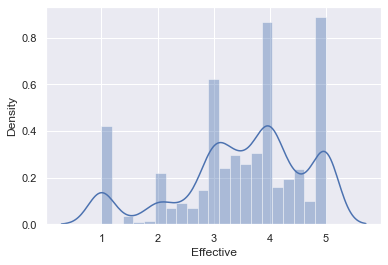

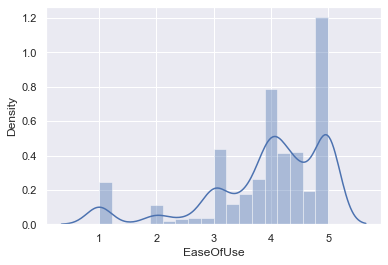

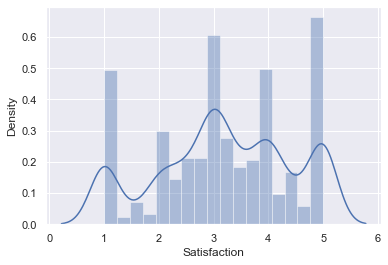

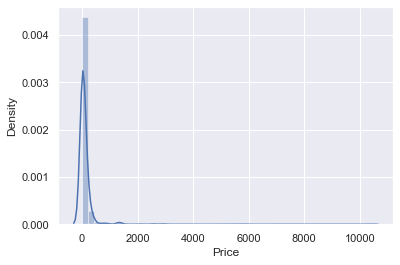

In [16]:
# Distributions of continuous variables

c_cols = ['Effective', 'EaseOfUse', 'Satisfaction', 'Price']
for column in c_cols :
    plt.close()
    sns.distplot(data[column])
    plt.show()

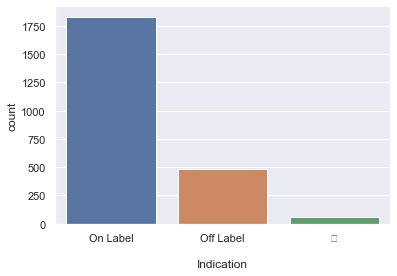

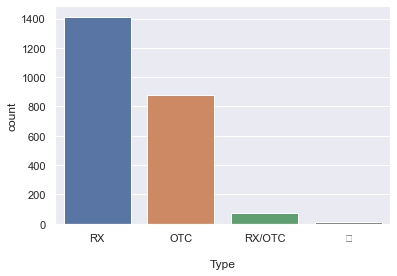

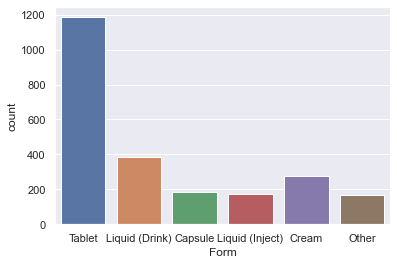

In [17]:
# Distributions of discrete variables

d_cols = ['Indication', 'Type', 'Form']
for column in d_cols :
    plt.close()
    sns.countplot(data[column])
    plt.show()

## Bi-Variate Analysis

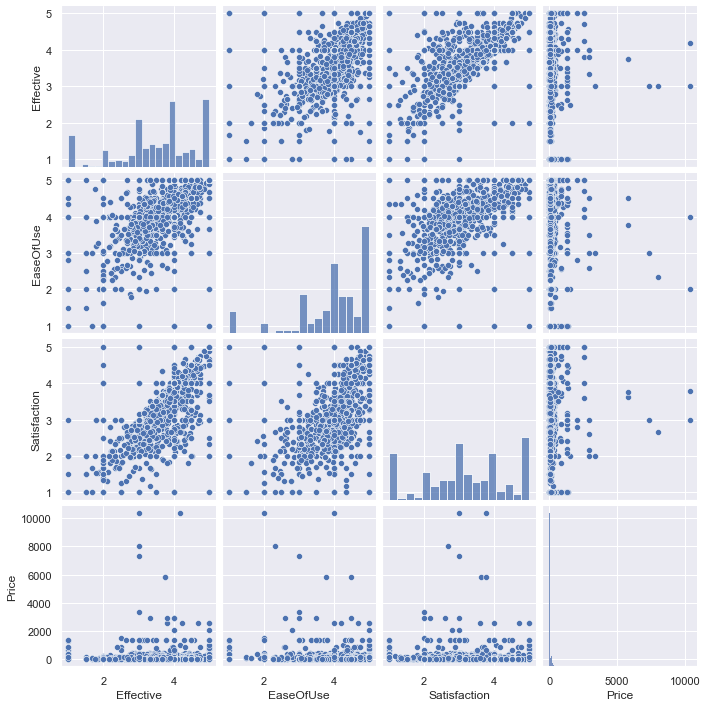

In [18]:
sns.pairplot(data)

In [19]:
corr = data.corr() # Finding the correlation between the variables
corr

,Effective,EaseOfUse,Satisfaction,Price
Effective,1.000000,0.604446,0.816542,0.009715
EaseOfUse,0.604446,1.000000,0.601047,-0.053196
Satisfaction,0.816542,0.601047,1.000000,0.000164
Price,0.009715,-0.053196,0.000164,1.000000


<Axes: >

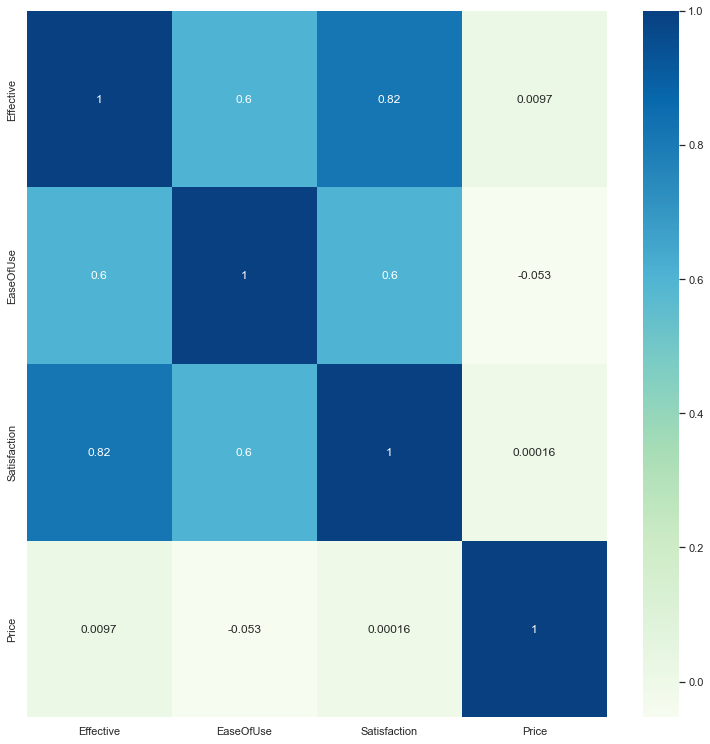

In [20]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(corr, annot=True,ax=ax,cmap='GnBu')

# -------------------------------------------------------------------------------------------------------

## Wordcloud

### Pre-Processing the Text Data

In [21]:
information = data['Information'].values
 
# Converting the text column as a single string for wordcloud
information_string = str(information)
 
# Converting the whole text to lowercase
information_string_cleaned = information_string.lower()
 
# Removing the twitter usernames from information string
information_string_cleaned = re.sub(r'@\w+', ' ', information_string_cleaned)
 
# Removing the URLS from the information string
information_string_cleaned = re.sub(r'http\S+', ' ', information_string_cleaned)
 
# Deleting everything which is not characters
information_string_cleaned = re.sub(r'[^a-z A-Z]', ' ',information_string_cleaned)
 
# Deleting any word which is less than 3-characters mostly those are stopwords
information_string_cleaned = re.sub(r'\b\w{1,2}\b', '', information_string_cleaned)
 
# Stripping extra spaces in the text
information_string_cleaned = re.sub(r' +', ' ', information_string_cleaned)
 
information_string_cleaned

' tlevofloxacin used treat variety bacterial infections this generic drug the average cash price for tablet each the generic levofloxacin you can buy levofloxacin the discounted price using the webmdrx coupon savings even this drug covered medicare your insurance recommend you compare prices the webmdrx coupon cash price may less than your pay this generic drug the average cash price for bottle each the generic moxifloxacin hcl you can buy moxifloxacin hcl the discounted price using the webmdrx coupon savings even this drug covered medicare your insurance recommend you compare prices the webmdrx coupon cash price may less than your pay tazithromycin antibiotic macrolide type this generic drug the average cash price for disp pack tablets each the generic azithromycin you can buy azithromycin the discounted price using the webmdrx coupon savings even this drug covered medicare your insurance recommend you compare prices the webmdrx coupon cash price may less than your pay tthis medicatio

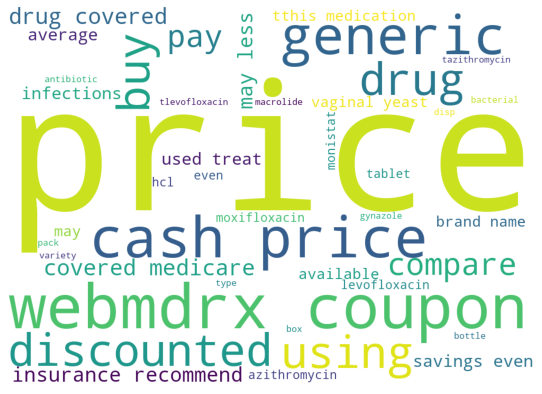

In [22]:
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(information_string_cleaned)
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

# -------------------------------------------------------------------------------------------------------

## Time Series Data Generation

In [23]:
from datetime import datetime

In [24]:
date_rng = ['Jan-01-2018', 'Apr-01-2018','Jul-01-2018', 'Oct-01-2018',
            'Jan-01-2019', 'Apr-01-2019','Jul-01-2019', 'Oct-01-2019',
            'Jan-01-2020', 'Apr-01-2020','Jul-01-2020', 'Oct-01-2020']

In [25]:
dates = [datetime.strptime(x,'%b-%d-%Y') for x in date_rng]
dates

[datetime.datetime(2018, 1, 1, 0, 0),
 datetime.datetime(2018, 4, 1, 0, 0),
 datetime.datetime(2018, 7, 1, 0, 0),
 datetime.datetime(2018, 10, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 4, 1, 0, 0),
 datetime.datetime(2019, 7, 1, 0, 0),
 datetime.datetime(2019, 10, 1, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 4, 1, 0, 0),
 datetime.datetime(2020, 7, 1, 0, 0),
 datetime.datetime(2020, 10, 1, 0, 0)]

In [26]:
price = pd.read_csv('drugs_details.csv')
price.head()

,Condition,Drug,Form
0,Acute Bacterial Sinusitis,Amoxicillin,Capsule
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink)
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Tablet
3,Acute Bacterial Sinusitis,Ampicillin,Capsule
4,Acute Bacterial Sinusitis,Ampicillin,Tablet


In [27]:
newdf = pd.DataFrame(np.repeat(price.values, 4, axis=0))
newdf.columns = price.columns

newdf.head(10)

,Condition,Drug,Form
0,Acute Bacterial Sinusitis,Amoxicillin,Capsule
1,Acute Bacterial Sinusitis,Amoxicillin,Capsule
2,Acute Bacterial Sinusitis,Amoxicillin,Capsule
3,Acute Bacterial Sinusitis,Amoxicillin,Capsule
4,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink)
5,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink)
6,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink)
7,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink)
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Tablet
9,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Tablet


In [28]:
newdf['Date'] = np.tile(dates, len(newdf))[:len(newdf)]

In [29]:
newdf

,Condition,Drug,Form,Date
0,Acute Bacterial Sinusitis,Amoxicillin,Capsule,2018-01-01
1,Acute Bacterial Sinusitis,Amoxicillin,Capsule,2018-04-01
2,Acute Bacterial Sinusitis,Amoxicillin,Capsule,2018-07-01
3,Acute Bacterial Sinusitis,Amoxicillin,Capsule,2018-10-01
4,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink),2019-01-01
...,...,...,...,...
2515,vulvovaginal candidiasis,Terconazole,Cream,2019-10-01
2516,vulvovaginal candidiasis,Tioconazole,Other,2020-01-01
2517,vulvovaginal candidiasis,Tioconazole,Other,2020-04-01
2518,vulvovaginal candidiasis,Tioconazole,Other,2020-07-01


In [30]:
newdf['Price'] = np.random.uniform(20, 500, newdf.shape[0])

In [31]:
newdf

,Condition,Drug,Form,Date,Price
0,Acute Bacterial Sinusitis,Amoxicillin,Capsule,2018-01-01,199.668488
1,Acute Bacterial Sinusitis,Amoxicillin,Capsule,2018-04-01,228.177768
2,Acute Bacterial Sinusitis,Amoxicillin,Capsule,2018-07-01,97.626624
3,Acute Bacterial Sinusitis,Amoxicillin,Capsule,2018-10-01,125.926687
4,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink),2019-01-01,300.196059
...,...,...,...,...,...
2515,vulvovaginal candidiasis,Terconazole,Cream,2019-10-01,446.164243
2516,vulvovaginal candidiasis,Tioconazole,Other,2020-01-01,166.772212
2517,vulvovaginal candidiasis,Tioconazole,Other,2020-04-01,386.217508
2518,vulvovaginal candidiasis,Tioconazole,Other,2020-07-01,444.633269


In [32]:
newdf['Date'] = pd.to_datetime(newdf['Date'])
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Condition  2520 non-null   object        
 1   Drug       2520 non-null   object        
 2   Form       2520 non-null   object        
 3   Date       2520 non-null   datetime64[ns]
 4   Price      2520 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 98.6+ KB


In [33]:
# Function to get month from a date
def Function_get_month(inpDate):
    return(inpDate.month)

# Function to get Year from a date
def Function_get_year(inpDate):
    return(inpDate.year)


# Creating new columns
newdf['Month'] = newdf['Date'].apply(Function_get_month)
newdf['Year'] = newdf['Date'].apply(Function_get_year)

newdf.head()

,Condition,Drug,Form,Date,Price,Month,Year
0,Acute Bacterial Sinusitis,Amoxicillin,Capsule,2018-01-01,199.668488,1,2018
1,Acute Bacterial Sinusitis,Amoxicillin,Capsule,2018-04-01,228.177768,4,2018
2,Acute Bacterial Sinusitis,Amoxicillin,Capsule,2018-07-01,97.626624,7,2018
3,Acute Bacterial Sinusitis,Amoxicillin,Capsule,2018-10-01,125.926687,10,2018
4,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink),2019-01-01,300.196059,1,2019


In [34]:
newdf.set_index('Date', inplace=True)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2018-01-01 to 2020-10-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Condition  2520 non-null   object 
 1   Drug       2520 non-null   object 
 2   Form       2520 non-null   object 
 3   Price      2520 non-null   float64
 4   Month      2520 non-null   int64  
 5   Year       2520 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 137.8+ KB


In [35]:
newdf.head(10)

,Condition,Drug,Form,Price,Month,Year
Date,,,,,,
2018-01-01,Acute Bacterial Sinusitis,Amoxicillin,Capsule,199.668488,1,2018
2018-04-01,Acute Bacterial Sinusitis,Amoxicillin,Capsule,228.177768,4,2018
2018-07-01,Acute Bacterial Sinusitis,Amoxicillin,Capsule,97.626624,7,2018
2018-10-01,Acute Bacterial Sinusitis,Amoxicillin,Capsule,125.926687,10,2018
2019-01-01,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink),300.196059,1,2019
2019-04-01,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink),24.208849,4,2019
2019-07-01,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink),449.636744,7,2019
2019-10-01,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink),260.688817,10,2019
2020-01-01,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Tablet,160.429618,1,2020


In [36]:
newdf.to_csv('drug_price_data.csv')

## Time Series Analysis

In [37]:
price = pd.read_csv('drug_price_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

price.head(10)

,Condition,Drug,Form,Price,Month,Year
Date,,,,,,
2018-01-01,Acute Bacterial Sinusitis,Amoxicillin,Capsule,199.668488,1,2018
2018-04-01,Acute Bacterial Sinusitis,Amoxicillin,Capsule,228.177768,4,2018
2018-07-01,Acute Bacterial Sinusitis,Amoxicillin,Capsule,97.626624,7,2018
2018-10-01,Acute Bacterial Sinusitis,Amoxicillin,Capsule,125.926687,10,2018
2019-01-01,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink),300.196059,1,2019
2019-04-01,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink),24.208849,4,2019
2019-07-01,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink),449.636744,7,2019
2019-10-01,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Liquid (Drink),260.688817,10,2019
2020-01-01,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Tablet,160.429618,1,2020


In [38]:
# Aggregating the price for each month for all conditions
pd.crosstab(columns = price['Month'],
            index = price['Year'],
            values = price['Price'],
            aggfunc = 'sum')

Month,1,4,7,10
Year,,,,
2018,55762.071553,54295.681399,52900.620484,57440.408107
2019,55503.660963,54319.680004,52842.668403,54806.792058
2020,54181.718623,54417.138647,60255.724531,54202.919314


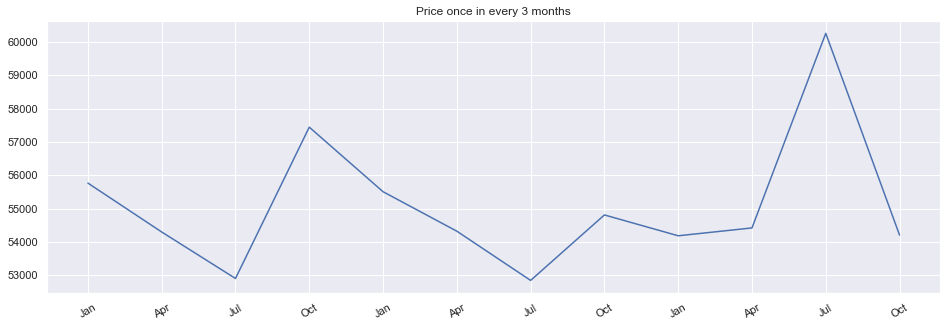

In [39]:
price_by_month = pd.crosstab(columns = price['Year'],
            index = price['Month'],
            values = price['Price'],
            aggfunc='sum').melt()['value']

MonthNames = ['Jan','Apr','Jul','Oct']*3

# Plotting the Price
price_by_month.plot(kind='line', figsize=(16,5), title='Price once in every 3 months')
# Setting the x-axis labels
plotLabels = plt.xticks(np.arange(0,12,1),MonthNames, rotation=30)

### Drilling Down by Health Conditions - Fever

In [40]:
price.groupby(['Condition']).sum()

,Price,Month,Year
Condition,,,
Acute Bacterial Sinusitis,14645.603849,308,113060
Atopic Dermatitis,66709.770955,1386,508788
Bacterial Conjunctivitis,16771.746629,352,129220
Bacterial Urinary Tract Infection,52190.409623,1122,411876
Infantile Autism,3098.872735,66,24228
Influenza,2181.855974,44,16148
Pharyngitis due to Streptococcus Pyogenes,19563.442336,418,153448
Sleepiness Due To Obstructive Sleep Apnea,2364.171375,44,16148
adenocarcinoma of pancreas,8451.697647,176,64608


In [41]:
# Filtering only fever data
fever = price[price['Condition']=='fever']

fever

,Condition,Drug,Form,Price,Month,Year
Date,,,,,,
2018-01-01,fever,ASA-Acetaminophen-Salicyl-Caff,Liquid (Drink),54.541498,1,2018
2018-04-01,fever,ASA-Acetaminophen-Salicyl-Caff,Liquid (Drink),346.551711,4,2018
2018-07-01,fever,ASA-Acetaminophen-Salicyl-Caff,Liquid (Drink),398.628861,7,2018
2018-10-01,fever,ASA-Acetaminophen-Salicyl-Caff,Liquid (Drink),228.228963,10,2018
2019-01-01,fever,ASA-Acetaminophen-Salicyl-Caff,Tablet,140.486597,1,2019
...,...,...,...,...,...,...
2019-10-01,fever,"Pseudoephedrine-Ibuprofen, Brompheniram-PSE-Ac...",Liquid (Drink),262.573509,10,2019
2020-01-01,fever,"Pseudoephedrine-Ibuprofen, Ibuprofen",Liquid (Drink),469.113866,1,2020
2020-04-01,fever,"Pseudoephedrine-Ibuprofen, Ibuprofen",Liquid (Drink),392.628122,4,2020


In [42]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=fever['Month'],
            index=fever['Year'],
            values=fever['Price'],
            aggfunc='sum')

Month,1,4,7,10
Year,,,,
2018,4627.364486,5005.865403,3065.002254,4713.089667
2019,4682.351641,4951.876870,4501.571035,4976.745734
2020,4830.426698,4563.490819,5965.416212,4418.015633


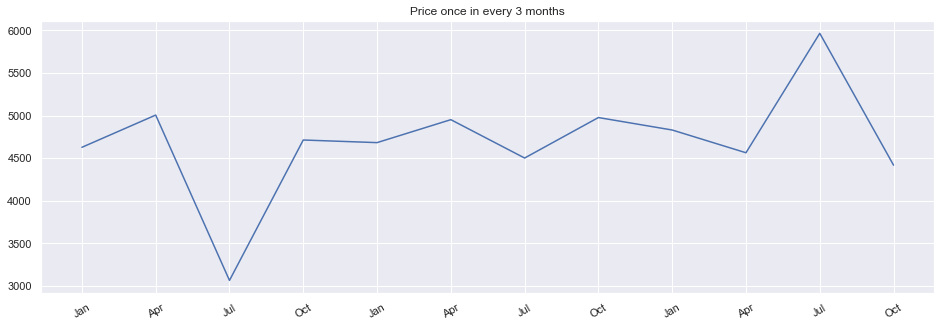

In [43]:
price_by_month = pd.crosstab(columns = fever['Year'],
            index = fever['Month'],
            values = fever['Price'],
            aggfunc='sum').melt()['value']

MonthNames = ['Jan','Apr','Jul','Oct']*3

# Plotting the Price
price_by_month.plot(kind='line', figsize=(16,5), title='Price once in every 3 months')
# Setting the x-axis labels
plotLabels = plt.xticks(np.arange(0,12,1),MonthNames, rotation=30)